# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Clasificación, Softmax, Iris</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Importa módulos](#Importa-módulos)
* [Funciones de activación](#Funciones-de-activación)
* [El conjunto de datos Iris](#El-conjunto-de-datos-Iris)
* [Lectura de datos](#Lectura-de-datos)
* [Preprocesamiento](#Preprocesamiento)
* [Crea el modelo usando la API funcional](#Crea-el-modelo-usando-la-API-funcional)
* [Compila](#Compila)
* [Entrena](#Entrena)
* [Evaluación del modelo](#Evaluación-del-modelo)
* [Predicciones](#Predicciones)
* [Matriz de confusión](#Matriz-de-confusión)



## <span style="color:blue">Introducción</span>

Eeta lección está dedicada a un modelo  de clasificación con mútliples categorías, que corresponde a la generalización natural del modelo logístico.

Practicaremos la codificación *one-hot* para los datos de salida.

También usaremos la API funcional de tf.keras, que es una forma de programación maś flexible y poderosa.

Usaremos las funciones *relu* para capas intermedias y entrada y la función de activación *softmax* para la salida, debido a que se tienen varias clases. 

## <span style="color:blue">Importa módulos</span>

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
#from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
#from sklearn import KFold
print("Versión de Tensorflow:", tf.__version__)

Versión de Tensorflow: 2.4.1


## <span style="color:blue">Funciones de activación</span> 

### Relu

Dada la salida del sumador digamos $y=\mathbf{w}'\mathbf{x} +b$, la función de activación *relu* esta definida por

$$
\text{relu}(y) = \begin{cases} &0, \text{ si } y\le 0,\\
 &y, \text{ en otro caso } \end{cases}
$$



### Softmax


Dados los valores $x_1,\ldots, x_n$ la función *softmax *  es definida por

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

Es decir, *softmax* transforma los valores en un función de probabilidad.

## <span style="color:blue">El conjunto de datos Iris</span> 


Este conjunto de datos fue introducido por sir [Ronald Fisher]()

## Lectura de datos

In [4]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


## <span style="color:blue">Pre-procesamiento</span> 

La variable objetivo (target) tiene tres categorías. Usaremos la codificación one-hot.

### Codificación one-hot

In [5]:
y_train= pd.DataFrame(to_categorical(training.Species))
y_train.columns = target_dimensions

y_test = pd.DataFrame(to_categorical(test.Species))
y_test.columns = target_dimensions

In [6]:
y_test

,Setosa,Versicolor,Virginica
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


### Elimina columna Species 

In [7]:
training.drop(['Species'], axis=1, inplace=True)
#test.drop(['Species'], axis=1, inplace=True)
y_test_species = test.pop('Species') # extrae la columna y la coloca en y_test_species
#
#Si necesita subir al dataframe la recodificación use estas líneas
#training = training.join(labels_training )
#test = test.join(labels_test )

### Normaliza los features

#### StandardScaler

In [8]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(training)
print (scaler.mean_)

# escala training y test
x_train = scaler.transform(training)
x_test = scaler.transform(test)

# labels ( no requieren escalación)


[5.845      3.065      3.73916667 1.19666667]


## <span style="color:blue">Crea el modelo usando la API funcional</span> 

La API funcional de Keras es bastante más flexible y poderosa que el modelo Sequential

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_entrada (InputLayer)    [(None, 4)]               0         
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
primera_capa_oculta (Dense)  (None, 8)                 40        
_________________________________________________________________
segunda_capa_oculta (Dense)  (None, 16)                144       
_________________________________________________________________
capa_salida (Dense)          (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


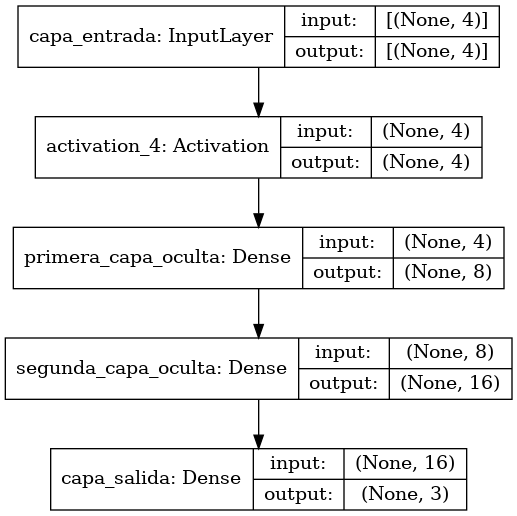

In [26]:
# Con la API funcion se requiere la capa Input que transforma la entrada 
# en un tensor de tensorflow directamente
#
inputs = Input(shape=(4,),name='capa_entrada')
#
# vamos construyendo capa por capa
x = Activation('relu')(inputs)
x = Dense(8, activation='relu',name='primera_capa_oculta')(x)
x = Dense(16, activation='relu', name='segunda_capa_oculta')(x)
outputs = Dense(3, activation='softmax', name='capa_salida')(x)

# Creamos ahora el modelo
model_iris = Model(inputs=inputs, outputs=outputs)

model_iris.summary()
plot_model(model_iris, to_file='../Imagenes/iris_model.png', 
           show_shapes=True)

## <span style="color:blue">Compila</span> 

In [27]:
model_iris.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## <span style="color:blue">Entrena</span> 

In [28]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 100


In [29]:
history = model_iris.fit(x_train, y_train,
                    batch_size= 16,
                    epochs= epochs,
                    validation_split=0.1, verbose=0,
                    callbacks=[PrintDot()])     
                   


....................................................................................................

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.192462,0.916667,0.348559,0.916667,95
96,0.191321,0.916667,0.347131,0.916667,96
97,0.189729,0.916667,0.345881,0.916667,97
98,0.188451,0.916667,0.345651,0.916667,98
99,0.187301,0.916667,0.344144,0.916667,99


## <span style="color:blue">Evaluación del modelo</span> 

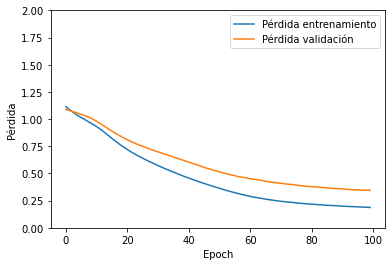

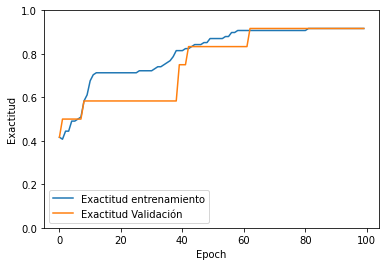

In [31]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Pérdida')
  plt.plot(hist['epoch'], hist['loss'],
           label='Pérdida entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Pérdida validación')
  plt.ylim([0,2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Exactitud')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud entrenamiento')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Exactitud Validación')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

## <span style="color:blue">Predicciones</span> 

In [32]:
# Predicting the Test set results
y_pred = model_iris.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)

## <span style="color:blue">Matriz de confusión</span> 

In [33]:
cm = confusion_matrix(y_test_species, y_pred_c)

In [34]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1]+ cm[2][2])/y_test_species.shape[0])*100))

Our accuracy is 93.33333333333333%


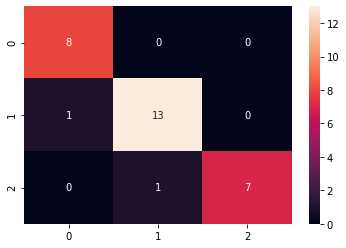

In [35]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

[Regresar al inicio](#Contenido)